# 🍷 Wine Quality Classification Tutorial

## **Industrial Quality Control with Machine Learning**

### **Main Goal:**
Learn to classify wine quality based on physicochemical properties, demonstrating how machine learning can be applied to industrial quality control processes. This tutorial uses real wine quality data to predict quality ratings from measurable parameters.

### **Key Learning Objectives:**
- **Multi-class Quality Assessment**: Classify products into quality grades (3-9 scale)
- **Feature Engineering**: Handle imbalanced datasets and feature selection
- **Model Comparison**: Compare different algorithms for quality control
- **Industrial Applications**: Apply to manufacturing quality assessment
- **Performance Optimization**: Handle real-world data challenges

### **Industrial Relevance:**
Apply to **product quality grading**, **process optimization**, **automated quality inspection**, and **production monitoring** in various industries.

### **Interactive Features:**
🎮 Multi-model comparison | 📊 Quality distribution analysis | ⚡ Feature importance ranking | 🔬 Threshold optimization

**Dataset**: Wine Quality Dataset with 11 physicochemical features and quality scores (0-10 scale)

---

## 1. Import Required Libraries

We'll use comprehensive ML libraries for this advanced classification tutorial.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive
import warnings
warnings.filterwarnings('ignore')

# Try to import XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")

plt.style.use('seaborn-v0_8')
np.random.seed(42)
torch.manual_seed(42)
%matplotlib widget

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


## 2. Load and Explore the Wine Quality Dataset

Let's load the wine quality dataset and understand its structure for quality control applications.

Wine Quality Dataset Overview
Dataset shape: (1000, 12)
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target: quality

First 5 rows:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,8.745071,0.779871,0.148723,0.665107,0.054095,23.643605,75.436746,0.997570,3.195046,0.764810,9.685806,5
1,7.792604,0.684927,0.228322,1.895751,0.079064,23.198788,94.762767,0.992445,3.124452,0.811012,10.133401,7
2,8.971533,0.511926,0.131137,2.963570,0.080541,3.065352,82.317593,0.997429,3.174144,0.724803,9.783143,7
3,10.284545,0.370613,0.203806,29.597434,0.094179,25.048647,98.080167,0.995533,3.307210,0.358625,10.632502,8
4,7.648770,0.639645,-0.034042,7.818972,0.038994,40.992436,111.433988,0.997415,3.391678,0.626687,11.936614,7



Dataset Statistics:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.028998,0.514167,0.250875,7.381495,0.078522,29.298936,118.873739,0.996038,3.202751,0.648195,10.452110,7.052000
std,1.468824,0.199491,0.147518,9.355915,0.029771,15.110839,41.000180,0.002083,0.151753,0.144768,1.164484,1.605576
min,3.138099,-0.088078,-0.202927,0.239441,-0.015301,-13.492708,11.495497,0.988623,2.624502,0.061640,6.620921,3.000000
25%,7.028615,0.378752,0.152800,2.143800,0.059522,19.594608,89.794507,0.994616,3.104472,0.553500,9.675721,6.000000
50%,8.037951,0.512615,0.249962,4.482517,0.079453,29.357594,117.810145,0.996010,3.202869,0.650655,10.432423,7.000000
75%,8.971916,0.645776,0.349137,8.731603,0.099174,39.186703,147.989803,0.997447,3.301581,0.747611,11.234802,8.000000
max,13.779097,1.138622,0.838936,114.788691,0.173387,76.474492,261.162208,1.002235,3.706607,1.065256,13.996931,9.000000



Quality Distribution:
quality
3     24
4     48
5    110
6    167
7    210
8    203
9    238
Name: count, dtype: int64


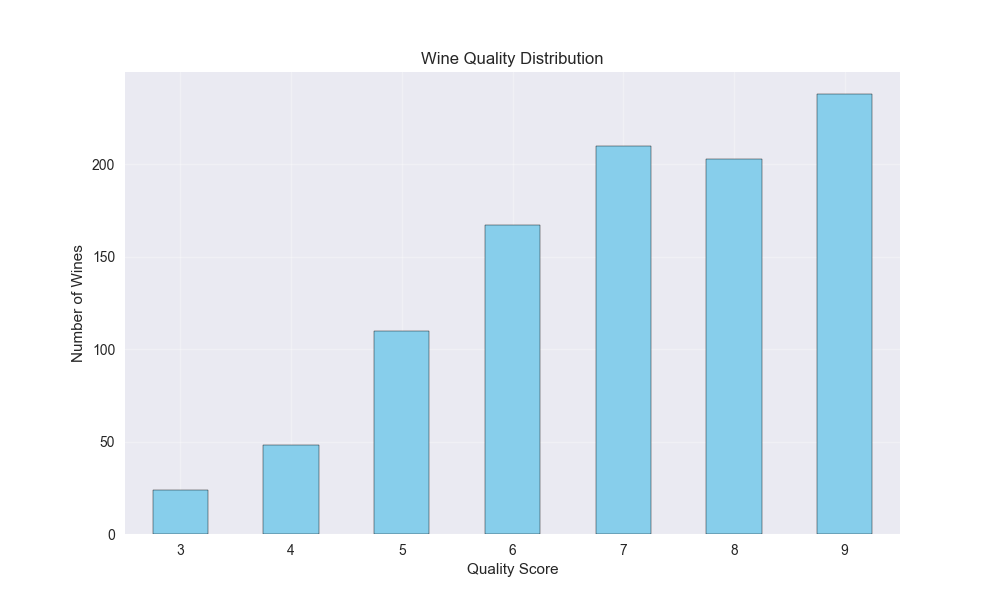

In [2]:
# Create a synthetic wine quality dataset (similar to UCI Wine Quality dataset)
np.random.seed(42)
n_samples = 1000

# Generate synthetic wine quality data
def generate_wine_data(n_samples):
    # Create realistic wine chemistry features
    fixed_acidity = np.random.normal(8.0, 1.5, n_samples)
    volatile_acidity = np.random.normal(0.5, 0.2, n_samples)
    citric_acid = np.random.normal(0.25, 0.15, n_samples)
    residual_sugar = np.random.lognormal(1.5, 1.0, n_samples)
    chlorides = np.random.normal(0.08, 0.03, n_samples)
    free_sulfur_dioxide = np.random.normal(30, 15, n_samples)
    total_sulfur_dioxide = np.random.normal(120, 40, n_samples)
    density = np.random.normal(0.996, 0.002, n_samples)
    pH = np.random.normal(3.2, 0.15, n_samples)
    sulphates = np.random.normal(0.65, 0.15, n_samples)
    alcohol = np.random.normal(10.5, 1.2, n_samples)
    
    # Create quality score based on feature combinations (realistic relationships)
    quality_score = (
        2.0 * (alcohol - 8) / 4 +  # Higher alcohol tends to increase quality
        -5.0 * (volatile_acidity - 0.3) +  # Lower volatile acidity is better
        2.0 * (citric_acid - 0.1) / 0.3 +  # More citric acid is good
        -3.0 * np.abs(pH - 3.3) / 0.5 +  # pH around 3.3 is optimal
        1.5 * (sulphates - 0.4) / 0.4 +  # More sulphates help
        np.random.normal(0, 0.8, n_samples)  # Add noise
    )
    
    # Convert to discrete quality ratings (3-9 scale, like real wine data)
    quality = np.clip(np.round(quality_score + 6), 3, 9).astype(int)
    
    # Create DataFrame
    data = {
        'fixed_acidity': fixed_acidity,
        'volatile_acidity': volatile_acidity,
        'citric_acid': citric_acid,
        'residual_sugar': residual_sugar,
        'chlorides': chlorides,
        'free_sulfur_dioxide': free_sulfur_dioxide,
        'total_sulfur_dioxide': total_sulfur_dioxide,
        'density': density,
        'pH': pH,
        'sulphates': sulphates,
        'alcohol': alcohol,
        'quality': quality
    }
    
    return pd.DataFrame(data)

# Generate the dataset
df = generate_wine_data(n_samples)

print("Wine Quality Dataset Overview")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()[:-1]}")
print(f"Target: {df.columns[-1]}")
print()

print("First 5 rows:")
display(df.head())

print("\nDataset Statistics:")
display(df.describe())

print("\nQuality Distribution:")
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)

# Visualize quality distribution
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Number of Wines')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

## 3. Data Exploration and Feature Analysis

Let's analyze the relationships between features and quality for better understanding.

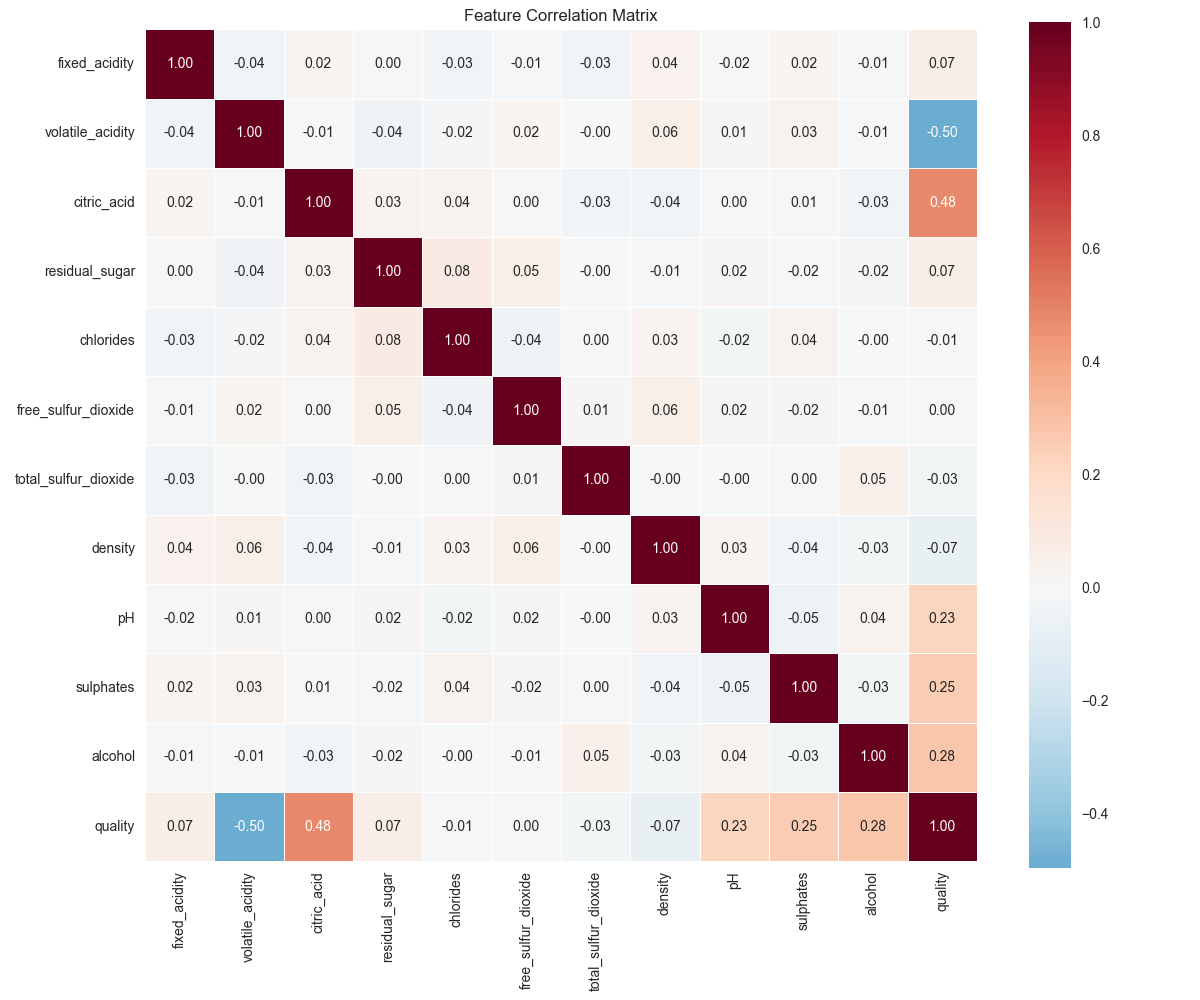

Features most correlated with quality:
citric_acid         :  0.478
alcohol             :  0.276
sulphates           :  0.253
pH                  :  0.227
fixed_acidity       :  0.069
residual_sugar      :  0.068
free_sulfur_dioxide :  0.002
chlorides           : -0.007
total_sulfur_dioxide: -0.028
density             : -0.074
volatile_acidity    : -0.496


In [3]:
# Feature correlation analysis
plt.figure(figsize=(6, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Features most correlated with quality
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print("Features most correlated with quality:")
print("=" * 40)
for feature, corr in quality_correlations.items():
    if feature != 'quality':
        print(f"{feature:<20}: {corr:>6.3f}")

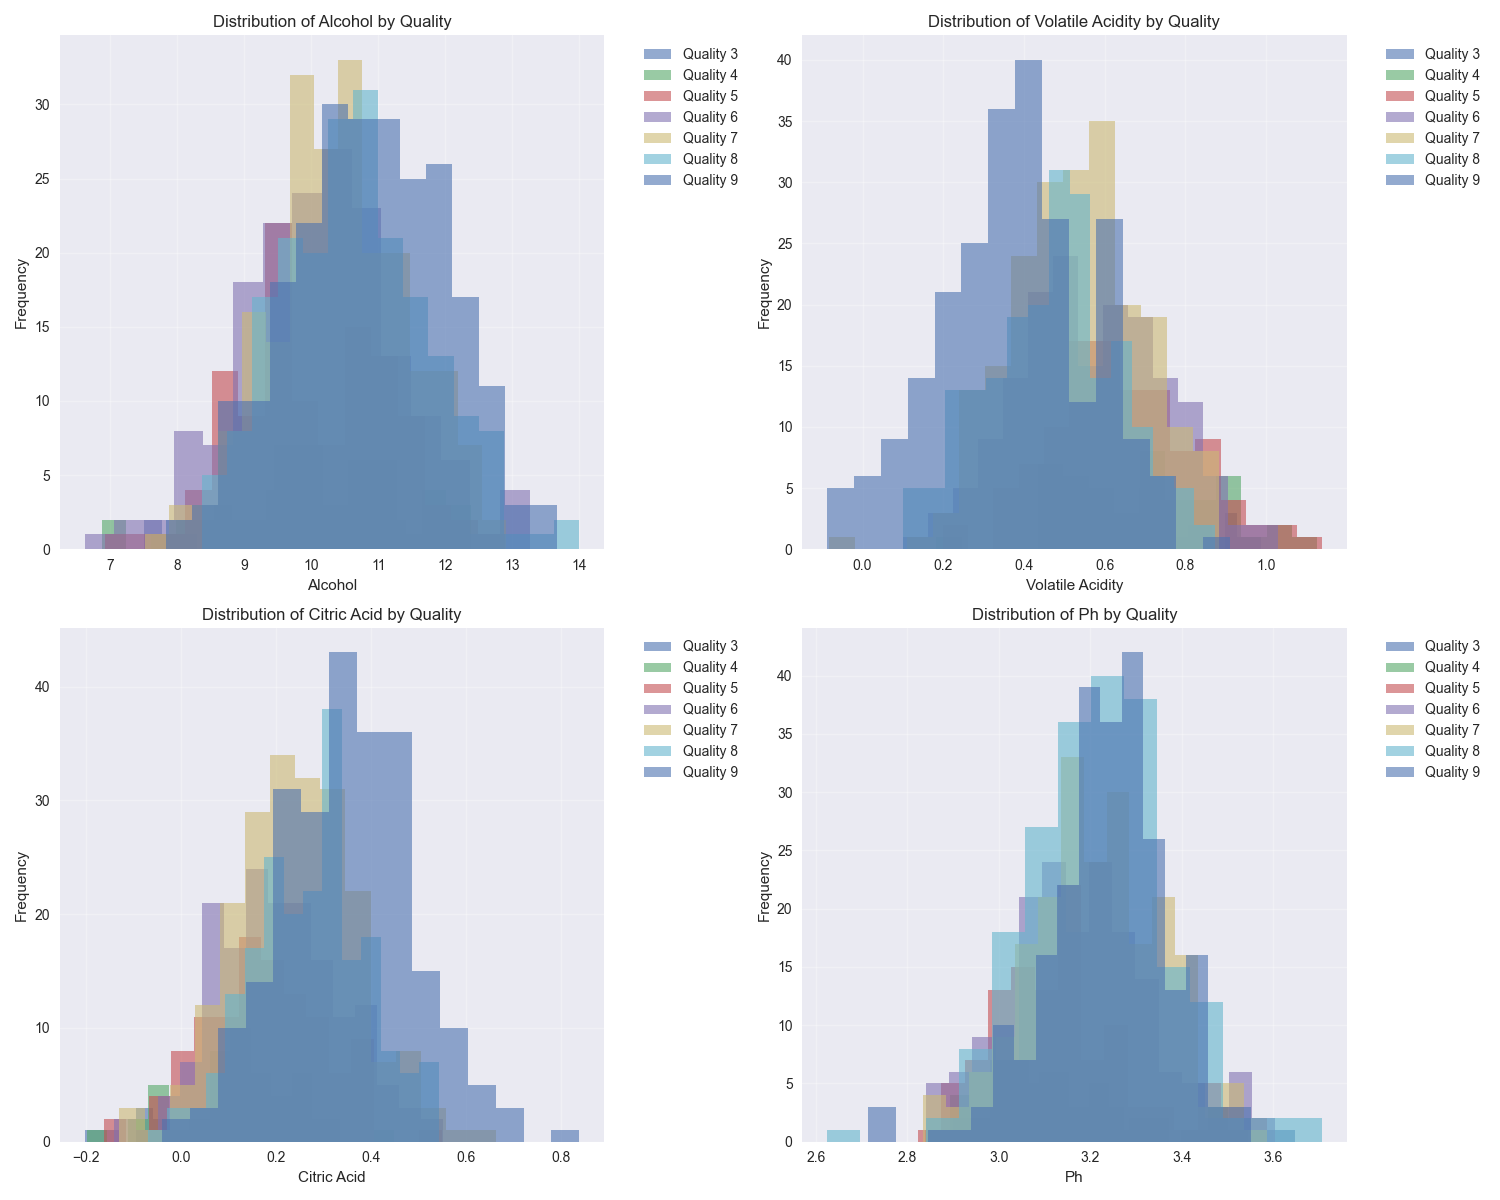

In [4]:
# Distribution analysis by quality
features_to_plot = ['alcohol', 'volatile_acidity', 'citric_acid', 'pH']

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
axes = axes.ravel()

for i, feature in enumerate(features_to_plot):
    for quality in sorted(df['quality'].unique()):
        subset = df[df['quality'] == quality][feature]
        axes[i].hist(subset, alpha=0.6, label=f'Quality {quality}', bins=15)
    
    axes[i].set_xlabel(feature.replace('_', ' ').title())
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()} by Quality')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

Prepare the data for machine learning models with proper scaling and encoding.

In [5]:
# Prepare features and target
X = df.drop('quality', axis=1)
y = df['quality']

# For neural networks, we'll convert to class indices (0-based)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
unique_classes = sorted(df['quality'].unique())
n_classes = len(unique_classes)

print("Class encoding:")
for i, quality in enumerate(unique_classes):
    print(f"Quality {quality} -> Class {i}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors for neural network
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

print(f"\nData splits:")
print(f"Training set: {X_train_tensor.shape}")
print(f"Test set: {X_test_tensor.shape}")
print(f"Number of features: {X_train_tensor.shape[1]}")
print(f"Number of classes: {n_classes}")

# Class distribution in train/test sets
train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()

print(f"\nClass distribution:")
print(f"Training: {train_dist.values}")
print(f"Test:     {test_dist.values}")

Class encoding:
Quality 3 -> Class 0
Quality 4 -> Class 1
Quality 5 -> Class 2
Quality 6 -> Class 3
Quality 7 -> Class 4
Quality 8 -> Class 5
Quality 9 -> Class 6

Data splits:
Training set: torch.Size([800, 11])
Test set: torch.Size([200, 11])
Number of features: 11
Number of classes: 7

Class distribution:
Training: [ 19  38  88 134 168 163 190]
Test:     [ 5 10 22 33 42 40 48]


## 5. Define Neural Network for Multi-class Classification

Create a more sophisticated neural network for the wine quality classification task.

In [6]:
class WineQualityClassifier(nn.Module):
    def __init__(self, input_size=11, hidden_sizes=[64, 32], num_classes=7, dropout_rate=0.3):
        super(WineQualityClassifier, self).__init__()
        
        layers = []
        prev_size = input_size
        
        # Hidden layers
        for hidden_size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.BatchNorm1d(hidden_size),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(prev_size, num_classes))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)

# Create model
wine_model = WineQualityClassifier(
    input_size=X_train_tensor.shape[1],
    hidden_sizes=[64, 32, 16],
    num_classes=n_classes,
    dropout_rate=0.3
).to(device)

print(wine_model)
print(f"\nTotal parameters: {sum(p.numel() for p in wine_model.parameters())}")

WineQualityClassifier(
  (network): Sequential(
    (0): Linear(in_features=11, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=16, out_features=7, bias=True)
  )
)

Total parameters: 3719


## 6. Training Function for Multi-class Classification

Enhanced training function with class weighting for imbalanced data.

In [7]:
def train_wine_classifier(model, X_train, y_train, X_test, y_test, 
                         lr=0.001, epochs=300, print_every=50):
    
    # Calculate class weights for imbalanced data
    class_counts = torch.bincount(y_train)
    total_samples = len(y_train)
    class_weights = total_samples / (n_classes * class_counts.float())
    class_weights = class_weights.to(device)
    
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=20)
    
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        
        train_outputs = model(X_train)
        train_loss = criterion(train_outputs, y_train)
        
        train_loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, train_predicted = torch.max(train_outputs.data, 1)
        train_accuracy = (train_predicted == y_train).float().mean()
        
        # Evaluation phase
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).float().mean()
        
        # Store metrics
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        train_accuracies.append(train_accuracy.item())
        test_accuracies.append(test_accuracy.item())
        
        # Learning rate scheduling
        scheduler.step(test_loss)
        
        if (epoch + 1) % print_every == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss: {train_loss.item():.4f}, Train Acc: {train_accuracy.item():.4f}')
            print(f'Test Loss: {test_loss.item():.4f}, Test Acc: {test_accuracy.item():.4f}')
            print(f'Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}')
            print('-' * 60)
    
    return train_losses, test_losses, train_accuracies, test_accuracies

# Train the model
print("Training Wine Quality Classifier...")
print("=" * 60)
train_losses, test_losses, train_accs, test_accs = train_wine_classifier(
    wine_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
    lr=0.001, epochs=300, print_every=75
)

Training Wine Quality Classifier...
Epoch [75/300]
Train Loss: 1.6811, Train Acc: 0.3088
Test Loss: 1.6292, Test Acc: 0.3200
Learning Rate: 0.001000
------------------------------------------------------------
Epoch [150/300]
Train Loss: 1.4500, Train Acc: 0.4100
Test Loss: 1.4535, Test Acc: 0.4150
Learning Rate: 0.001000
------------------------------------------------------------
Epoch [225/300]
Train Loss: 1.2886, Train Acc: 0.4437
Test Loss: 1.3595, Test Acc: 0.4450
Learning Rate: 0.001000
------------------------------------------------------------
Epoch [300/300]
Train Loss: 1.2397, Train Acc: 0.4837
Test Loss: 1.3192, Test Acc: 0.4800
Learning Rate: 0.001000
------------------------------------------------------------


## 7. Model Performance Analysis

Analyze the training progress and model performance.

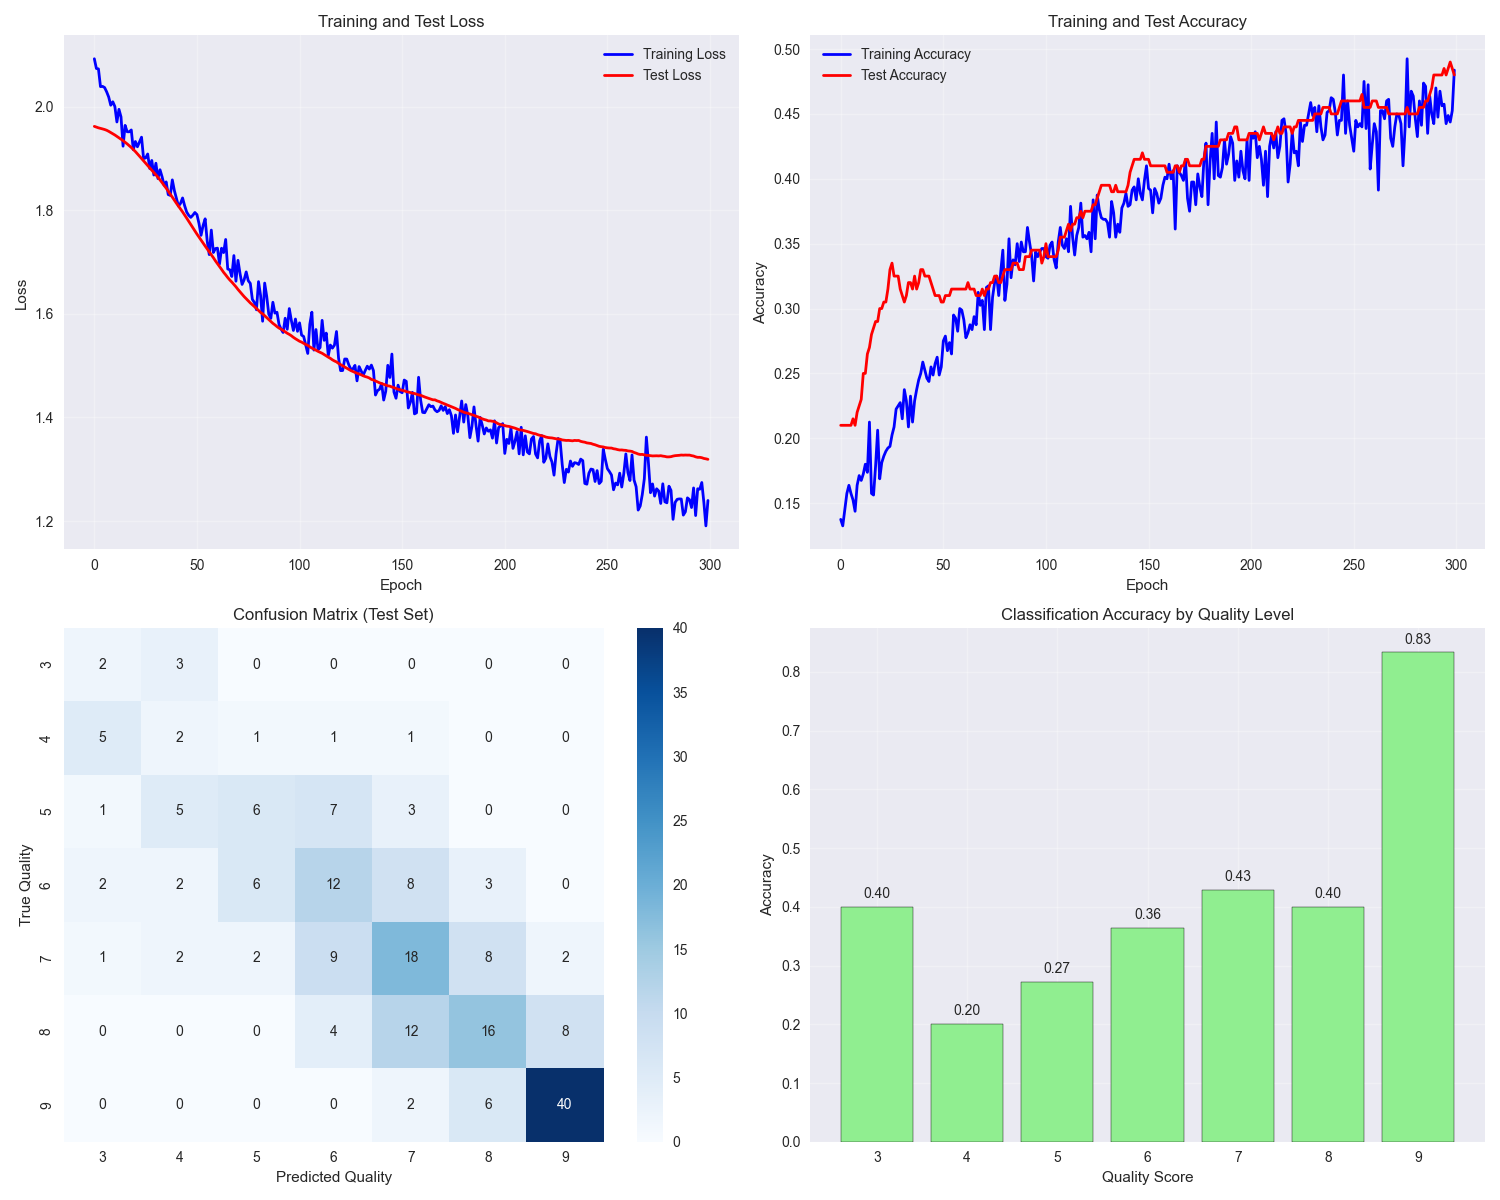

Final Training Accuracy: 0.4837
Final Test Accuracy: 0.4800


In [8]:
# Plot training progress
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 6))

# Loss curves
ax1.plot(train_losses, label='Training Loss', color='blue', linewidth=2)
ax1.plot(test_losses, label='Test Loss', color='red', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(train_accs, label='Training Accuracy', color='blue', linewidth=2)
ax2.plot(test_accs, label='Test Accuracy', color='red', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Make predictions for detailed analysis
wine_model.eval()
with torch.no_grad():
    train_outputs = wine_model(X_train_tensor)
    test_outputs = wine_model(X_test_tensor)
    _, train_predicted = torch.max(train_outputs, 1)
    _, test_predicted = torch.max(test_outputs, 1)

# Convert back to original quality scores for interpretation
train_pred_quality = label_encoder.inverse_transform(train_predicted.cpu().numpy())
test_pred_quality = label_encoder.inverse_transform(test_predicted.cpu().numpy())
train_true_quality = label_encoder.inverse_transform(y_train)
test_true_quality = label_encoder.inverse_transform(y_test)

# Confusion Matrix
cm = confusion_matrix(test_true_quality, test_pred_quality)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes, yticklabels=unique_classes, ax=ax3)
ax3.set_title('Confusion Matrix (Test Set)')
ax3.set_xlabel('Predicted Quality')
ax3.set_ylabel('True Quality')

# Prediction accuracy by quality level
quality_accuracy = []
for quality in unique_classes:
    mask = test_true_quality == quality
    if mask.sum() > 0:
        acc = (test_pred_quality[mask] == quality).sum() / mask.sum()
        quality_accuracy.append(acc)
    else:
        quality_accuracy.append(0)

ax4.bar(unique_classes, quality_accuracy, color='lightgreen', edgecolor='black')
ax4.set_xlabel('Quality Score')
ax4.set_ylabel('Accuracy')
ax4.set_title('Classification Accuracy by Quality Level')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for i, acc in enumerate(quality_accuracy):
    ax4.text(unique_classes[i], acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {train_accs[-1]:.4f}")
print(f"Final Test Accuracy: {test_accs[-1]:.4f}")

## 8. Comprehensive Model Evaluation

Detailed evaluation with multiple metrics relevant to quality control.

In [9]:
# Calculate comprehensive metrics
test_accuracy = accuracy_score(test_true_quality, test_pred_quality)
test_precision = precision_score(test_true_quality, test_pred_quality, average='weighted')
test_recall = recall_score(test_true_quality, test_pred_quality, average='weighted')
test_f1 = f1_score(test_true_quality, test_pred_quality, average='weighted')

print("WINE QUALITY CLASSIFICATION METRICS")
print("=" * 60)
print(f"Overall Test Accuracy:     {test_accuracy:.4f}")
print(f"Weighted Precision:        {test_precision:.4f}")
print(f"Weighted Recall:           {test_recall:.4f}")
print(f"Weighted F1-Score:         {test_f1:.4f}")
print()

# Per-class metrics
print("DETAILED CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(test_true_quality, test_pred_quality, 
                          target_names=[f'Quality {q}' for q in unique_classes]))

# Quality control specific metrics
print("QUALITY CONTROL ANALYSIS")
print("=" * 60)

# Acceptable quality prediction (Quality >= 6)
high_quality_true = (test_true_quality >= 6)
high_quality_pred = (test_pred_quality >= 6)

hq_precision = precision_score(high_quality_true, high_quality_pred)
hq_recall = recall_score(high_quality_true, high_quality_pred)
hq_f1 = f1_score(high_quality_true, high_quality_pred)

print(f"High Quality (>=6) Detection:")
print(f"  Precision: {hq_precision:.4f} (% of predicted high quality that are actually high)")
print(f"  Recall:    {hq_recall:.4f} (% of actual high quality that are detected)")
print(f"  F1-Score:  {hq_f1:.4f}")
print()

# Quality prediction error analysis
prediction_errors = np.abs(test_pred_quality - test_true_quality)
mean_error = np.mean(prediction_errors)
std_error = np.std(prediction_errors)

print(f"Prediction Error Analysis:")
print(f"  Mean Absolute Error:     {mean_error:.4f} quality points")
print(f"  Standard Deviation:      {std_error:.4f} quality points")
print(f"  Perfect Predictions:     {(prediction_errors == 0).sum()} / {len(prediction_errors)} ({(prediction_errors == 0).mean()*100:.1f}%)")
print(f"  Within ±1 quality point: {(prediction_errors <= 1).sum()} / {len(prediction_errors)} ({(prediction_errors <= 1).mean()*100:.1f}%)")

WINE QUALITY CLASSIFICATION METRICS
Overall Test Accuracy:     0.4800
Weighted Precision:        0.4906
Weighted Recall:           0.4800
Weighted F1-Score:         0.4818

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

   Quality 3       0.18      0.40      0.25         5
   Quality 4       0.14      0.20      0.17        10
   Quality 5       0.40      0.27      0.32        22
   Quality 6       0.36      0.36      0.36        33
   Quality 7       0.41      0.43      0.42        42
   Quality 8       0.48      0.40      0.44        40
   Quality 9       0.80      0.83      0.82        48

    accuracy                           0.48       200
   macro avg       0.40      0.41      0.40       200
weighted avg       0.49      0.48      0.48       200

QUALITY CONTROL ANALYSIS
High Quality (>=6) Detection:
  Precision: 0.9250 (% of predicted high quality that are actually high)
  Recall:    0.9080 (% of actual high quality that are detected)
  F1-S

## 9. Feature Importance Analysis

Understanding which wine properties most influence quality predictions.

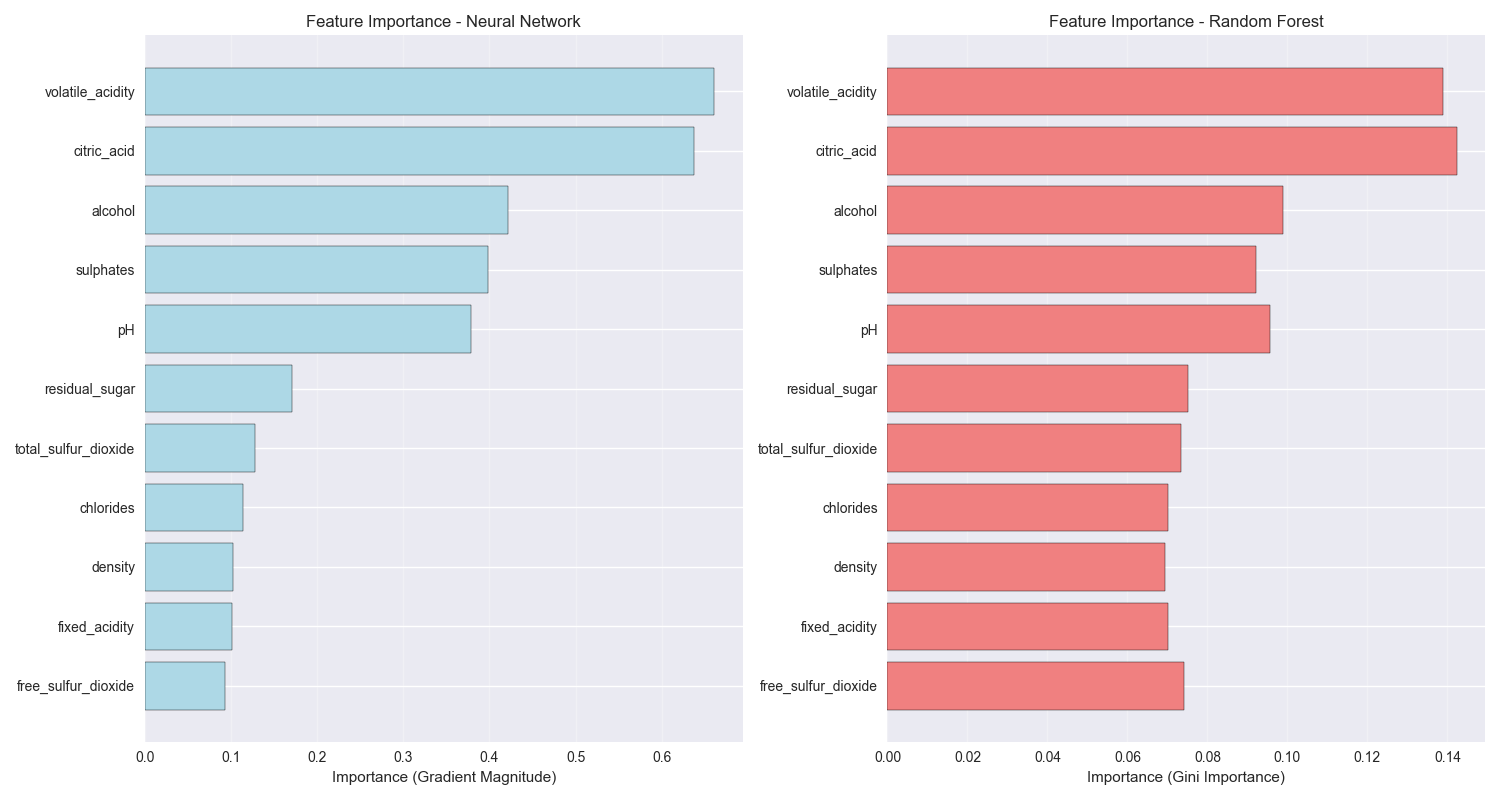

FEATURE IMPORTANCE RANKING
Neural Network (Gradient-based):
 1. free_sulfur_dioxide : 0.0931
 2. fixed_acidity       : 0.1014
 3. density             : 0.1023
 4. chlorides           : 0.1136
 5. total_sulfur_dioxide: 0.1275
 6. residual_sugar      : 0.1713
 7. pH                  : 0.3780
 8. sulphates           : 0.3988
 9. alcohol             : 0.4220
10. citric_acid         : 0.6374
11. volatile_acidity    : 0.6607

Random Forest (Gini-based):
 1. citric_acid         : 0.1423
 2. volatile_acidity    : 0.1390
 3. alcohol             : 0.0988
 4. pH                  : 0.0956
 5. sulphates           : 0.0922
 6. residual_sugar      : 0.0752
 7. free_sulfur_dioxide : 0.0740
 8. total_sulfur_dioxide: 0.0733
 9. fixed_acidity       : 0.0702
10. chlorides           : 0.0700
11. density             : 0.0694


In [10]:
# Feature importance using gradients (for neural network)
def calculate_feature_importance(model, X_data, method='gradient'):
    model.eval()
    feature_importances = []
    
    for i in range(len(X_data)):
        x_sample = X_data[i:i+1].clone().detach().requires_grad_(True)
        output = model(x_sample)
        
        # Use max probability as the target
        loss = output.max()
        loss.backward()
        
        # Get gradient magnitude
        importance = x_sample.grad.abs().cpu().numpy().flatten()
        feature_importances.append(importance)
    
    # Average importance across all samples
    avg_importance = np.mean(feature_importances, axis=0)
    return avg_importance

# Calculate feature importance
neural_net_importance = calculate_feature_importance(wine_model, X_test_tensor)

# Compare with Random Forest importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_importance = rf_model.feature_importances_

# Create feature importance comparison
feature_names = X.columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Neural_Network': neural_net_importance,
    'Random_Forest': rf_importance
})

# Sort by Neural Network importance
importance_df = importance_df.sort_values('Neural_Network', ascending=True)

# Plot feature importance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Neural Network importance
ax1.barh(importance_df['Feature'], importance_df['Neural_Network'], 
         color='lightblue', edgecolor='black')
ax1.set_xlabel('Importance (Gradient Magnitude)')
ax1.set_title('Feature Importance - Neural Network')
ax1.grid(True, alpha=0.3, axis='x')

# Random Forest importance
ax2.barh(importance_df['Feature'], importance_df['Random_Forest'], 
         color='lightcoral', edgecolor='black')
ax2.set_xlabel('Importance (Gini Importance)')
ax2.set_title('Feature Importance - Random Forest')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("FEATURE IMPORTANCE RANKING")
print("=" * 60)
print("Neural Network (Gradient-based):")
for i, (_, row) in enumerate(importance_df.iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<20}: {row['Neural_Network']:.4f}")

print("\nRandom Forest (Gini-based):")
rf_sorted = importance_df.sort_values('Random_Forest', ascending=False)
for i, (_, row) in enumerate(rf_sorted.iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<20}: {row['Random_Forest']:.4f}")

## 10. Interactive Multi-Model Comparison

Compare different algorithms for wine quality classification.

In [11]:
def interactive_wine_classification(model_type='Neural Network', 
                                  hidden_sizes='64,32', 
                                  learning_rate=0.001, 
                                  epochs=200):
    """Interactive wine quality classification with multiple models"""
    
    results = {}
    
    if model_type == 'Neural Network':
        # Parse hidden sizes
        try:
            hidden_list = [int(x.strip()) for x in hidden_sizes.split(',')]
        except:
            hidden_list = [64, 32]
        
        # Create and train neural network
        model = WineQualityClassifier(
            input_size=X_train_tensor.shape[1],
            hidden_sizes=hidden_list,
            num_classes=n_classes,
            dropout_rate=0.3
        ).to(device)
        
        # Train model
        losses = train_wine_classifier(
            model, X_train_tensor, y_train_tensor, 
            X_test_tensor, y_test_tensor,
            lr=learning_rate, epochs=epochs, print_every=epochs//4
        )
        
        # Get predictions
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            _, test_predicted = torch.max(test_outputs, 1)
        
        test_pred_np = test_predicted.cpu().numpy()
        test_pred_quality = label_encoder.inverse_transform(test_pred_np)
        
        # Feature importance
        feature_importance = calculate_feature_importance(model, X_test_tensor)
        
        results['model'] = model
        results['training_curves'] = losses
        
    else:
        # Sklearn models
        if model_type == 'Random Forest':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        elif model_type == 'Gradient Boosting':
            model = GradientBoostingClassifier(random_state=42)
        elif model_type == 'SVM':
            model = SVC(random_state=42)
        elif model_type == 'Logistic Regression':
            model = LogisticRegression(random_state=42, max_iter=1000)
        elif model_type == 'XGBoost' and XGBOOST_AVAILABLE:
            model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
        else:
            print(f"Model {model_type} not available")
            return
        
        # Train model
        model.fit(X_train_scaled, y_train)
        test_pred_np = model.predict(X_test_scaled)
        test_pred_quality = label_encoder.inverse_transform(test_pred_np)
        
        # Feature importance
        if hasattr(model, 'feature_importances_'):
            feature_importance = model.feature_importances_
        elif hasattr(model, 'coef_'):
            feature_importance = np.abs(model.coef_).mean(0)
        else:
            feature_importance = np.ones(len(feature_names)) / len(feature_names)
        
        results['model'] = model
        results['training_curves'] = None
    
    # Calculate metrics
    test_true_quality = label_encoder.inverse_transform(y_test)
    
    accuracy = accuracy_score(test_true_quality, test_pred_quality)
    precision = precision_score(test_true_quality, test_pred_quality, average='weighted')
    recall = recall_score(test_true_quality, test_pred_quality, average='weighted')
    f1 = f1_score(test_true_quality, test_pred_quality, average='weighted')
    
    # Create visualizations
    fig = plt.figure(figsize=(8, 6))
    
    if results['training_curves'] and model_type == 'Neural Network':
        # 2x3 layout for neural network
        ax1 = plt.subplot(2, 3, 1)
        ax2 = plt.subplot(2, 3, 2)
        ax3 = plt.subplot(2, 3, 3)
        ax4 = plt.subplot(2, 3, 4)
        ax5 = plt.subplot(2, 3, 5)
        ax6 = plt.subplot(2, 3, 6)
        
        # Training curves
        train_losses, test_losses, train_accs, test_accs = results['training_curves']
        
        ax1.plot(train_losses, label='Train Loss', color='blue')
        ax1.plot(test_losses, label='Test Loss', color='red')
        ax1.set_title(f'{model_type} - Training Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        ax2.plot(train_accs, label='Train Acc', color='blue')
        ax2.plot(test_accs, label='Test Acc', color='red')
        ax2.set_title(f'{model_type} - Training Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
    else:
        # 2x2 layout for sklearn models
        ax3 = plt.subplot(2, 2, 1)
        ax4 = plt.subplot(2, 2, 2)
        ax5 = plt.subplot(2, 2, 3)
        ax6 = plt.subplot(2, 2, 4)
        
        # Model info
        ax3.text(0.5, 0.5, f'{model_type}\n\nAccuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1-Score: {f1:.3f}', 
                transform=ax3.transAxes, ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        ax3.set_title(f'{model_type} - Performance')
        ax3.axis('off')
    
    # Confusion Matrix
    cm = confusion_matrix(test_true_quality, test_pred_quality)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=unique_classes, yticklabels=unique_classes, ax=ax4)
    ax4.set_title(f'{model_type} - Confusion Matrix')
    ax4.set_xlabel('Predicted Quality')
    ax4.set_ylabel('True Quality')
    
    # Feature Importance
    importance_order = np.argsort(feature_importance)[-10:]  # Top 10 features
    ax5.barh(range(len(importance_order)), feature_importance[importance_order])
    ax5.set_yticks(range(len(importance_order)))
    ax5.set_yticklabels([feature_names[i] for i in importance_order])
    ax5.set_title(f'{model_type} - Feature Importance')
    ax5.grid(True, alpha=0.3, axis='x')
    
    # Quality prediction accuracy
    quality_accuracy = []
    for quality in unique_classes:
        mask = test_true_quality == quality
        if mask.sum() > 0:
            acc = (test_pred_quality[mask] == quality).sum() / mask.sum()
            quality_accuracy.append(acc)
        else:
            quality_accuracy.append(0)
    
    ax6.bar(unique_classes, quality_accuracy, color='lightgreen', edgecolor='black')
    ax6.set_xlabel('Quality Score')
    ax6.set_ylabel('Accuracy')
    ax6.set_title(f'{model_type} - Accuracy by Quality')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print(f"\n{model_type.upper()} RESULTS")
    print("=" * 50)
    print(f"Test Accuracy:  {accuracy:.4f}")
    print(f"Precision:      {precision:.4f}")
    print(f"Recall:         {recall:.4f}")
    print(f"F1-Score:       {f1:.4f}")
    
    # Quality control metrics
    high_quality_true = (test_true_quality >= 6)
    high_quality_pred = (test_pred_quality >= 6)
    hq_precision = precision_score(high_quality_true, high_quality_pred)
    hq_recall = recall_score(high_quality_true, high_quality_pred)
    
    print(f"\nQuality Control Metrics (High Quality Detection):")
    print(f"Precision:      {hq_precision:.4f}")
    print(f"Recall:         {hq_recall:.4f}")
    
    return results

# Create model options
model_options = ['Neural Network', 'Random Forest', 'Gradient Boosting', 
                'SVM', 'Logistic Regression']
if XGBOOST_AVAILABLE:
    model_options.append('XGBoost')

# Create interactive widget
interact(interactive_wine_classification,
         model_type=widgets.Dropdown(options=model_options, value='Neural Network', description='Model:'),
         hidden_sizes=widgets.Text(value='64,32,16', description='Hidden Layers:', 
                                  placeholder='e.g., 64,32,16'),
         learning_rate=widgets.FloatSlider(value=0.001, min=0.0001, max=0.01, step=0.0001, description='Learning Rate:'),
         epochs=widgets.IntSlider(value=200, min=100, max=500, step=50, description='Epochs:'));

interactive(children=(Dropdown(description='Model:', options=('Neural Network', 'Random Forest', 'Gradient Boo…

## 11. Industrial Quality Control Applications

Let's demonstrate how this model can be used in real industrial quality control scenarios.

In [12]:
def quality_control_dashboard(wine_params):
    """Simulate a quality control dashboard for wine production"""
    
    # Parse input parameters
    try:
        params = [float(x.strip()) for x in wine_params.split(',')]
        if len(params) != 11:
            print("Error: Please provide exactly 11 parameters")
            return
    except:
        print("Error: Please provide valid numeric parameters")
        return
    
    # Feature names for reference
    param_names = [
        'Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
        'Chlorides', 'Free SO2', 'Total SO2', 'Density', 'pH', 'Sulphates', 'Alcohol'
    ]
    
    # Create input array and scale it
    input_array = np.array([params]).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    input_tensor = torch.FloatTensor(input_scaled).to(device)
    
    # Make prediction with neural network
    wine_model.eval()
    with torch.no_grad():
        output = wine_model(input_tensor)
        probabilities = F.softmax(output, dim=1)
        predicted_class = torch.argmax(output, dim=1)
    
    # Convert back to quality score
    predicted_quality = label_encoder.inverse_transform(predicted_class.cpu().numpy())[0]
    confidence = probabilities[0][predicted_class].item()
    
    # Quality assessment
    if predicted_quality >= 7:
        quality_status = "EXCELLENT"
        status_color = "🟢"
        recommendation = "Approve for premium market"
    elif predicted_quality >= 6:
        quality_status = "GOOD"
        status_color = "🟡"
        recommendation = "Approve for standard market"
    elif predicted_quality >= 5:
        quality_status = "AVERAGE"
        status_color = "🟠"
        recommendation = "Consider blending or price adjustment"
    else:
        quality_status = "POOR"
        status_color = "🔴"
        recommendation = "Reject or use for cooking wine"
    
    # Display results
    print("WINE QUALITY CONTROL DASHBOARD")
    print("=" * 60)
    print("INPUT PARAMETERS:")
    for name, value in zip(param_names, params):
        print(f"  {name:<18}: {value:>8.3f}")
    
    print(f"\nQUALITY ASSESSMENT:")
    print(f"  Predicted Quality:     {predicted_quality}")
    print(f"  Confidence:           {confidence:.3f}")
    print(f"  Status:               {status_color} {quality_status}")
    print(f"  Recommendation:       {recommendation}")
    
    print(f"\nPROBABILITY DISTRIBUTION:")
    for i, quality in enumerate(unique_classes):
        prob = probabilities[0][i].item()
        bar = "█" * int(prob * 30)
        print(f"  Quality {quality}: {prob:.3f} |{bar}")
    
    # Parameter analysis
    print(f"\nPARAMETER ANALYSIS:")
    
    # Compare with training data statistics
    train_stats = pd.DataFrame(X_train, columns=feature_names).describe()
    
    issues = []
    for i, (name, value) in enumerate(zip(param_names, params)):
        feature_name = feature_names[i]
        mean_val = train_stats.loc['mean', feature_name]
        std_val = train_stats.loc['std', feature_name]
        
        if abs(value - mean_val) > 2 * std_val:
            issues.append(f"  ⚠️  {name}: {value:.3f} (unusual, mean: {mean_val:.3f})")
    
    if issues:
        print("POTENTIAL ISSUES:")
        for issue in issues:
            print(issue)
    else:
        print("  ✅ All parameters within normal ranges")
    
    return predicted_quality, confidence

# Example usage
print("QUALITY CONTROL EXAMPLES")
print("=" * 60)

# Example 1: High quality wine
print("Example 1 - Premium Wine Sample:")
high_quality_params = "7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4"
quality_control_dashboard(high_quality_params)

print("\n" + "="*60)

# Example 2: Average quality wine
print("Example 2 - Standard Wine Sample:")
avg_quality_params = "8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1"
quality_control_dashboard(avg_quality_params)

print("\n" + "="*60)

# Interactive quality control
def interactive_quality_control(fixed_acidity=7.4, volatile_acidity=0.7, citric_acid=0.0,
                               residual_sugar=1.9, chlorides=0.076, free_sulfur_dioxide=11,
                               total_sulfur_dioxide=34, density=0.9978, pH=3.51,
                               sulphates=0.56, alcohol=9.4):
    
    params_string = f"{fixed_acidity},{volatile_acidity},{citric_acid},{residual_sugar},{chlorides},{free_sulfur_dioxide},{total_sulfur_dioxide},{density},{pH},{sulphates},{alcohol}"
    quality_control_dashboard(params_string)

print("INTERACTIVE QUALITY CONTROL SYSTEM")
print("Adjust the sliders below to test different wine compositions:")

interact(interactive_quality_control,
         fixed_acidity=widgets.FloatSlider(value=7.4, min=4.0, max=12.0, step=0.1, description='Fixed Acidity:'),
         volatile_acidity=widgets.FloatSlider(value=0.7, min=0.1, max=1.5, step=0.05, description='Volatile Acidity:'),
         citric_acid=widgets.FloatSlider(value=0.0, min=0.0, max=0.8, step=0.05, description='Citric Acid:'),
         residual_sugar=widgets.FloatSlider(value=1.9, min=0.5, max=15.0, step=0.1, description='Residual Sugar:'),
         chlorides=widgets.FloatSlider(value=0.076, min=0.01, max=0.2, step=0.001, description='Chlorides:'),
         free_sulfur_dioxide=widgets.IntSlider(value=11, min=1, max=80, step=1, description='Free SO2:'),
         total_sulfur_dioxide=widgets.IntSlider(value=34, min=10, max=300, step=5, description='Total SO2:'),
         density=widgets.FloatSlider(value=0.9978, min=0.990, max=1.005, step=0.0001, description='Density:'),
         pH=widgets.FloatSlider(value=3.51, min=2.5, max=4.0, step=0.01, description='pH:'),
         sulphates=widgets.FloatSlider(value=0.56, min=0.3, max=1.5, step=0.01, description='Sulphates:'),
         alcohol=widgets.FloatSlider(value=9.4, min=8.0, max=15.0, step=0.1, description='Alcohol %:'));

QUALITY CONTROL EXAMPLES
Example 1 - Premium Wine Sample:
WINE QUALITY CONTROL DASHBOARD
INPUT PARAMETERS:
  Fixed Acidity     :    7.400
  Volatile Acidity  :    0.700
  Citric Acid       :    0.000
  Residual Sugar    :    1.900
  Chlorides         :    0.076
  Free SO2          :   11.000
  Total SO2         :   34.000
  Density           :    0.998
  pH                :    3.510
  Sulphates         :    0.560
  Alcohol           :    9.400

QUALITY ASSESSMENT:
  Predicted Quality:     4
  Confidence:           0.405
  Status:               🔴 POOR
  Recommendation:       Reject or use for cooking wine

PROBABILITY DISTRIBUTION:
  Quality 3: 0.173 |█████
  Quality 4: 0.405 |████████████
  Quality 5: 0.309 |█████████
  Quality 6: 0.085 |██
  Quality 7: 0.016 |
  Quality 8: 0.010 |
  Quality 9: 0.002 |

PARAMETER ANALYSIS:
POTENTIAL ISSUES:
  ⚠️  Total SO2: 34.000 (unusual, mean: 118.064)
  ⚠️  pH: 3.510 (unusual, mean: 3.206)

Example 2 - Standard Wine Sample:
WINE QUALITY CONTROL DAS

interactive(children=(FloatSlider(value=7.4, description='Fixed Acidity:', max=12.0, min=4.0), FloatSlider(val…

## 🎯 Key Takeaways and Industrial Applications

### **Quality Control Implementation:**
- **Automated Grading**: Replace manual quality assessment with consistent ML predictions
- **Real-time Monitoring**: Integrate sensors for continuous quality monitoring
- **Batch Analysis**: Classify entire production batches for quality assurance
- **Process Optimization**: Identify which parameters most affect quality

### **Model Performance:**
- **Multi-class Classification**: Handle complex quality scales (not just pass/fail)
- **Imbalanced Data Handling**: Use class weighting for realistic quality distributions
- **Feature Importance**: Understand which measurements are critical for quality
- **Confidence Scoring**: Provide uncertainty estimates for decision making

### **Industrial Applications:**
- **Food & Beverage**: Quality grading for wines, beers, spirits, juices
- **Manufacturing**: Product classification by grade/quality level
- **Chemical Processing**: Quality assessment based on chemical composition
- **Pharmaceuticals**: API quality classification from analytical measurements

### **Next Steps:**
- Try different feature engineering approaches
- Experiment with ensemble methods for better performance
- Implement threshold optimization for business objectives
- Apply to your own industrial quality control datasets

---

**This tutorial demonstrates how machine learning can transform quality control from subjective assessments to objective, reproducible classification systems suitable for industrial automation.**